In [1]:
import pandas as pd, numpy as np
import seaborn as sns

import re

import plotly
import plotly.express as px
# import ploty.go as go
import matplotlib.pyplot as plt

df = pd.read_csv("../data/csv/clean_V1.csv")

df.sample(5)

,Price,Title,RAM,Hard Drive,Graphics Coprocessor,Number of USB 3.0 Ports,Brand,Series,Operating System,Processor Brand,...,Processor Speed,Memory Technology,Hard Disk Description,Graphics Chipset Brand,DisplaySizeInches,HorizontalPixels,VerticalPixels,WeightKg,Refurbished,base_color
1322,268.7224,"HP - 14"" Laptop - AMD Ryzen 3 - 8GB Memory - 1...",4 GB DDR4,128 GB SSD,AMD,1,HP,14-fq0033dx,Windows 11 S,AMD,...,3,other,SSD,AMD,14.0,1366.0,768.0,2.113739,0,Silver
7917,1186.6500,"ASUS Vivobook 16"" FHD+ (1920x1200) Laptop 2023...",16 GB DDR4,1 TB SSD,AMD,3,ASUS,Vivobook 16,Windows 11 Pro,AMD,...,5,ddr4,SSD,AMD,16.0,1920.0,1080.0,1.880000,0,Black
7720,629.0000,"Dell Latitude 5510 Laptop Computer, 15.6inch F...",DDR4,512 GB SSD,Intel,4,Dell,Dell Latitude 5510,Windows 10 Pro,Intel,...,1.8 GHz,other,SSD,Intel,15.6,1920.0,1920.0,NaN,1,other
198,444.1760,"ASUS Vivobook 15.6” FHD Laptop, AMD Ryzen 3 32...",4 LPDDR5,128 GB SSD,AMD Radeon Vegan,2,ASUS,Vivobook Go,Windows 11 Home,AMD,...,3,other,SSD,AMD,15.6,1920.0,1080.0,1.814368,0,Transparent
2693,367.8400,(Refurbished) Dell Latitude Laptop 7470 Intel ...,32 GB,32 GB,Intel,3,Dell,7470,Windows 10 Pro,Intel,...,2.4 GHz,ddr4,SSD,Intel,14.1,1920.0,1080.0,1.590000,1,other


In [2]:
df.isna().sum()

Price                        57
Title                         0
RAM                         339
Hard Drive                  237
Graphics Coprocessor        339
Number of USB 3.0 Ports       0
Brand                         0
Series                        7
Operating System            219
Processor Brand             130
Item model number             0
Graphics Card Ram Size      921
Manufacturer                 84
Form Factor                  64
Processor Type              271
Processor Speed             562
Memory Technology             0
Hard Disk Description       515
Graphics Chipset Brand        0
DisplaySizeInches           154
HorizontalPixels           1232
VerticalPixels             1235
WeightKg                    888
Refurbished                   0
base_color                    0
dtype: int64

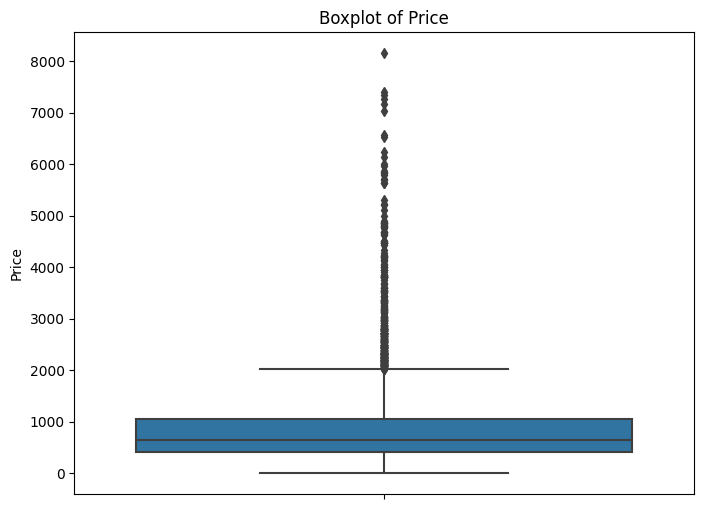

In [3]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Price', data=df)
plt.title('Boxplot of Price')
plt.show()

We definitely see that there are many outliers in our dataset.
- The moethod that we will be choosing to fill NaN values in Price is `median`



In [4]:
price_mdedian = df["Price"].median()

df["Price"] = df["Price"].fillna(price_mdedian)

In [5]:
# Extract only numeric values from 'RAM' column and convert to integers
df['RAM_in_GB'] = df['RAM'].apply(lambda x: re.findall(r'\b\d+\b', str(x)))

# Convert the first extracted numeric value to integer (if any), otherwise NaN
df['RAM_in_GB'] = df['RAM_in_GB'].apply(lambda x: int(x[0]) if len(x) > 0 and x[0].isdigit() else np.nan)

# Convert integers to strings to remove the decimal part only if it's .0
df['RAM_in_GB'] = df['RAM_in_GB'].apply(lambda x: str(x).replace('.0', '') if pd.notnull(x) and str(x).endswith('.0') else x)

df['RAM_in_GB'] = df['RAM_in_GB'].apply(lambda x: int(x) if not pd.isna(x) else np.nan)

df['RAM_in_GB'].unique()
df.drop(columns=["RAM"], inplace= True)

In [6]:
def analyze_outliers(rel_column):
    # Visualize the box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=rel_column, data=df)
    plt.title(f'Boxplot of {rel_column}')
    plt.show()

    # Identify outliers using IQR method
    Q1 = df[rel_column].quantile(0.25)
    Q3 = df[rel_column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[rel_column] < lower_bound) | (df[rel_column] > upper_bound)]
    num_outliers = outliers.shape[0]

    # Calculate summary statistics with and without outliers
    mean_with_outliers = df[rel_column].mean()
    std_dev_with_outliers = df[rel_column].std()

    mean_without_outliers = df[~df[rel_column].isin(outliers[rel_column])][rel_column].mean()
    std_dev_without_outliers = df[~df[rel_column].isin(outliers[rel_column])][rel_column].std()

    # Print results
    print("Number of outliers:", num_outliers)
    print("Mean with outliers:", mean_with_outliers)
    print("Standard deviation with outliers:", std_dev_with_outliers)
    print("Mean without outliers:", mean_without_outliers)
    print("Standard deviation without outliers:", std_dev_without_outliers)


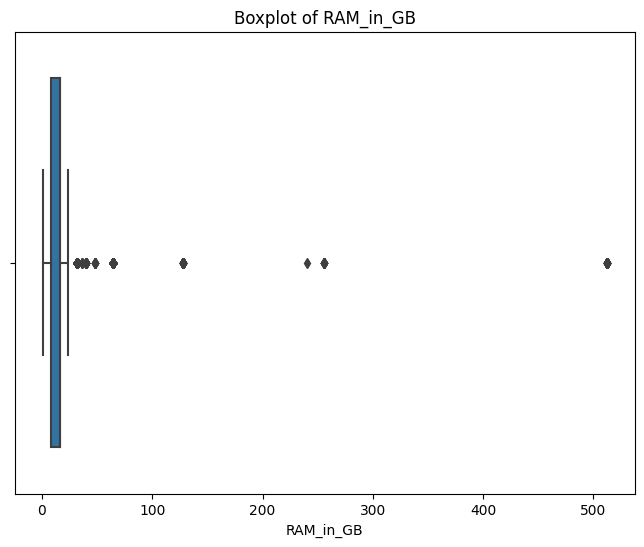

Number of outliers: 815
Mean with outliers: 19.563320109856576
Standard deviation with outliers: 45.941725942060444
Mean without outliers: 11.393971075100191
Standard deviation without outliers: 4.907300871884042


In [7]:
analyze_outliers("RAM_in_GB")

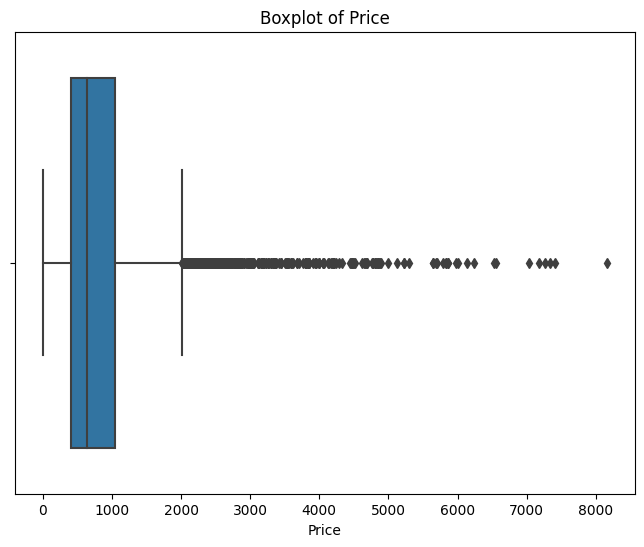

Number of outliers: 479
Mean with outliers: 866.4015881758187
Standard deviation with outliers: 728.6623228415245
Mean without outliers: 733.607122404661
Standard deviation without outliers: 445.55190580920845


In [8]:
analyze_outliers("Price")

In [9]:
df["Hard Drive"].unique()

array(['512 GB SSD', '128 GB SSD', '1 TB SSD', '64 GB SSD', '256 GB SSD',
       '128 GB Emmc', '64 GB Emmc', '128 GB',
       '32 GB Embedded MultiMediaCard', 'SSD', '16 GB SSD', '32 GB Emmc',
       '256 GB', '512 SSD', '512 GB M.2 2280 SSD', '2 TB SSD',
       '32 GB SSD', '512 GB M.2 2280 NVMe SSD', '1024 GB SSD', 'eMMC SSD',
       '128 GB UFS', 'Emmc', '512 GB', '64 GB Embedded MultiMediaCard',
       '320 GB Emmc', '1 TB', '500 GB', '14 TB SSD', '64 GB',
       '500 GB SSD', '512 GB Solid State Drive', '4 TB SSD', 'HDD',
       'eMMC', '128 GB HDD', 'Embedded MultiMediaCard', '192 GB SSD',
       '128 GB Hybrid', '256 GB HDD', '1000 GB SSD', '256 SSD',
       '8 TB SSD', '2 TB', 'Flash Storage', '1', '156 GB SSD',
       '64 GB HDD', '1 TB HDD', '32 GB', '2048 GB SSD', '8 GB SSD',
       '128 GB Flash Storage', '320 GB Hybrid', '64 SSD', '2000 GB SSD',
       '32 GB HDD', '16 GB', '2 TB Emmc', '240 GB SSD',
       '512 GB 1x 512GB M.2 2280 PCIe Gen4 TLC', nan,
       '32 GB eMMC

In [10]:
import pandas as pd
import re
import numpy as np

# Sample DataFrame
# df = pd.DataFrame({'Hard Drive': ['256GB SSD', '512GB SSD, 1TB HDD', '1TB SSD', '2TB HDD', 'Other']})

df_copy = df.copy()

# Regular expressions
storage_pattern = re.compile(r'(\d+\s*(?:GB|TB))\b', re.IGNORECASE)
ssd_pattern = re.compile(r'\b(ssd|hdd|other)\b', re.IGNORECASE)

# Function to extract storage capacities and types
def extract_storage(text):
    capacity = np.nan
    storage_type = 'Other'
    if pd.notna(text):
        text = text.lower()
        capacities = storage_pattern.findall(text)
        types = ssd_pattern.findall(text)
        
        # Extract capacity
        if capacities:
            capacity_text = capacities[0]
            if 'tb' in capacity_text:
                capacity = int(capacity_text.replace('tb', '')) * 1000
            else:
                capacity = int(capacity_text.replace('gb', ''))

        # Extract storage type
        if types:
            storage_type = types[0].capitalize()

    return capacity, storage_type

# Apply the function to the 'Storage' column
df_copy[['StorageCapacities', 'StorageTypes']] = pd.DataFrame(df_copy['Hard Drive'].apply(extract_storage).tolist(), index=df_copy.index)

df_copy['StorageCapacities'] = df_copy['StorageCapacities'].astype('Int64')

# df.drop(columns=["Hard Drive"], inplace=True)

(df_copy.sample(10))


,Price,Title,Hard Drive,Graphics Coprocessor,Number of USB 3.0 Ports,Brand,Series,Operating System,Processor Brand,Item model number,...,Graphics Chipset Brand,DisplaySizeInches,HorizontalPixels,VerticalPixels,WeightKg,Refurbished,base_color,RAM_in_GB,StorageCapacities,StorageTypes
4592,2130.256,HP ZBook Firefly 12th Gen Intel Core i7-1255U ...,512 GB SSD,NVIDIA RTX A500,0,HP,HP ZBook Firefly 16 inch G9 Mobile PC,Windows 11 Home,Intel,HP ZBook Firefly 16 inch G9 Mobile PC,...,NVIDIA,40.6,1920.0,1200.0,1.800000,0,Silver,16.0,512,Ssd
7176,263.990,"Ruzava/Aocwei Laptop Win 11 14"" 6GB DDR4 128GB...",128 GB SSD,Intel,2,Ruzava,A2,Win,Intel,A2,...,Intel,14.0,1920.0,1080.0,1.300000,0,Gray,6.0,128,Ssd
5053,408.000,(Refurbished) Dell Latitude Laptop 5490 Intel ...,512 GB SSD,Intel,3,Dell,5490-i5-Touch,Windows 10 Pro,Intel,5490-i5-8-512-cr,...,Intel,14.0,1920.0,1080.0,1.660000,1,other,8.0,512,Ssd
5139,649.440,(Refurbished) Dell Latitude Laptop 5490 Intel ...,SSD,Intel,3,Dell,5490-i7-Touch,Windows 10 Pro,Intel,5490-i5-8-2TB-cr,...,Intel,14.0,1920.0,1080.0,1.660000,1,other,8.0,<NA>,Ssd
113,623.560,"Apple 15in MacBook Pro, Retina, Touch Bar, 2.9...",512 GB SSD,AMD Radeon Pro 560,0,Apple,MacBook Pro,macOS 10.12 Sierra,Intel,FBA-MACBOOKPRO2017i72017-r,...,Intel,15.0,2560.0,1600.0,0.059817,1,Gray,16.0,512,Ssd
2771,1759.840,Samsung Galaxy Book3 360 Intel 13th Gen i5 Evo...,16 GB,Intel Iris Xe Graphics,0,Samsung,Galaxy Book3,Windows 11 Home,Intel,NP750QFG-KA2IN,...,Intel,39.6,NaN,NaN,1.490000,0,Graphite,16.0,16,Other
1929,492.640,"HP Laptop 15s, Intel Pentium Silver N6000, 15....",SSD,Intel UHD Graphics,2,HP,15s-fq3073TU,Windows 11 Home,Intel,15s-fq3073TU,...,Intel,39.6,1920.0,1080.0,1.690000,0,Silver,NaN,<NA>,Ssd
7013,1386.450,"ASUS Vivobook S 15 15.6"" FHD (1920x1080) Lapto...",512 GB SSD,Intel,1,ASUS,K3502,Windows 11 Pro,Intel,K3502,...,Intel,15.6,1920.0,1080.0,1.800000,0,Black,16.0,512,Ssd
592,814.640,"HP 17 Laptop i5-1235U, 512 GB SSD, 16GB RAM, 1...",512 GB SSD,Intel HD Graphics 520,2,HP,HP 17T,Windows 11 Home,Intel,HP,...,Other,17.3,1600.0,900.0,2.381358,0,Silver,16.0,512,Ssd
633,746.640,"Lenovo IdeaPad 15.6"" FHD Touchscreen Laptop, I...",1 TB SSD,Intel Iris Xe Graphics,0,Lenovo,IdeaPad,Windows 11,Intel,IdeaPad,...,Intel,15.6,1920.0,1080.0,1.651075,0,other,16.0,1000,Ssd


In [11]:
df_copy["StorageTypes"].value_counts()

StorageTypes
Ssd      6426
Other    1517
Hdd        88
Name: count, dtype: int64

In [12]:
# storage_pattern = re.compile(r'(\d+\s*(?:GB|TB))\b', re.IGNORECASE)
# ssd_pattern = re.compile(r'\b(ssd|hdd|other)\b', re.IGNORECASE)

# def extract_storage(text):
#     capacities = []
#     types = []
#     if pd.notna(text):
#         text = text.lower()
#         capacities = storage_pattern.findall(text)
#         types = ssd_pattern.findall(text)
        
#         # Convert into int and remove 'TB' and 'GB'
#         capacities = [int(cap.replace('tb', '')) * 1000 if 'tb' in cap else int(cap.replace('gb', '')) for cap in capacities]

#     if len(capacities) == 0:
#         capacities = np.nan
#     if len(types) == 0:
#         types.append('Other')
#     return capacities, types

# # Apply the function to the 'Storage' column
# df['StorageCapacities'], df['StorageTypes'] = zip(*df['Hard Drive'].apply(extract_storage))

# df.drop(columns=["Hard Drive"], inplace=True)

In [13]:
df.isna().sum()

Price                         0
Title                         0
Hard Drive                  237
Graphics Coprocessor        339
Number of USB 3.0 Ports       0
Brand                         0
Series                        7
Operating System            219
Processor Brand             130
Item model number             0
Graphics Card Ram Size      921
Manufacturer                 84
Form Factor                  64
Processor Type              271
Processor Speed             562
Memory Technology             0
Hard Disk Description       515
Graphics Chipset Brand        0
DisplaySizeInches           154
HorizontalPixels           1232
VerticalPixels             1235
WeightKg                    888
Refurbished                   0
base_color                    0
RAM_in_GB                  1477
dtype: int64

In [14]:
pd.set_option("display.max_rows", None)
df["Graphics Coprocessor"].value_counts()

Graphics Coprocessor
Intel                                                                                                                                    2971
Intel UHD Graphics                                                                                                                        686
Intel Iris Xe Graphics                                                                                                                    598
AMD                                                                                                                                       320
1                                                                                                                                         316
Intel HD Graphics 520                                                                                                                     182
AMD Radeon Graphics                                                                                                            

Intel, NVIDIA, Qualcomm, | Iris, integrated -> Intel | Apple, M2 | AMD | Radeon -> AMD

In [15]:
df["Graphics Coprocessor"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8031 entries, 0 to 8030
Series name: Graphics Coprocessor
Non-Null Count  Dtype 
--------------  ----- 
7692 non-null   object
dtypes: object(1)
memory usage: 62.9+ KB


In [16]:

df["Graphics_Coprocessor_Name"] = df["Graphics Coprocessor"].apply(lambda x: x.split()[0] if not isinstance(x, float) else np.nan)


In [17]:
df["Graphics_Coprocessor_Name"].value_counts()

Graphics_Coprocessor_Name
Intel                   5169
AMD                      691
NVIDIA                   622
1                        316
Integrated               210
intel                    179
INTEGRATED               135
4                         80
Radeon                    48
INTEL                     32
UHD                       22
NVIDIA®                   21
MediaTek                  14
Nvidia                    12
Intel®                    12
Qualcomm                  11
Celeron                    8
RTX                        8
Iris                       8
Apple                      8
M1                         6
i7-8565U                   6
PowerVR                    5
ARM                        5
Quadro                     4
3050                       4
i5-8350U                   4
Inter                      4
HD                         4
i7-8650U                   3
i7-1185G7                  3
Iris™                      3
i5-8365                    3
256.00           

In [18]:
text = "012"
print(text[0:2])

01


In [19]:
def fetch_processor(text):
    if isinstance(text, str):
        text = text.lower()
    else:
        return "Other"
    
    if text in ['intel', 'integrated', 'iris', 'uhd'] or text[0:2] in ['i3', 'i5', 'i7'] :
        return "Intel"
    elif text in ['amd', 'radeon']:
        return "AMD"
    elif text in ['nvidia', 'nvidia®', 'rtx', 'gtx']:
        return "NVIDIA"
    elif text in ['apple', 'm1', 'm2']:
        return "Apple" 
    else:
        return "Other"

In [20]:
df["Graphics_Coprocessor_Brand"] = df["Graphics_Coprocessor_Name"].apply(fetch_processor)

In [21]:
df["Graphics_Coprocessor_Brand"].value_counts()

Graphics_Coprocessor_Brand
Intel     5777
Other      833
AMD        741
NVIDIA     666
Apple       14
Name: count, dtype: int64

In [22]:
df.drop(columns = ["Graphics Coprocessor"], inplace=True)
df.drop(columns = ["Graphics_Coprocessor_Name"], inplace=True)

In [23]:
df.isna().sum()

Price                            0
Title                            0
Hard Drive                     237
Number of USB 3.0 Ports          0
Brand                            0
Series                           7
Operating System               219
Processor Brand                130
Item model number                0
Graphics Card Ram Size         921
Manufacturer                    84
Form Factor                     64
Processor Type                 271
Processor Speed                562
Memory Technology                0
Hard Disk Description          515
Graphics Chipset Brand           0
DisplaySizeInches              154
HorizontalPixels              1232
VerticalPixels                1235
WeightKg                       888
Refurbished                      0
base_color                       0
RAM_in_GB                     1477
Graphics_Coprocessor_Brand       0
dtype: int64

In [24]:
df[df["Series"].isna()]

,Price,Title,Hard Drive,Number of USB 3.0 Ports,Brand,Series,Operating System,Processor Brand,Item model number,Graphics Card Ram Size,...,Hard Disk Description,Graphics Chipset Brand,DisplaySizeInches,HorizontalPixels,VerticalPixels,WeightKg,Refurbished,base_color,RAM_in_GB,Graphics_Coprocessor_Brand
2338,24.800,(Refurbished) Logitech C270 Webcam,NaN,0,Logitech,NaN,NaN,NaN,960-000694-cr,NaN,...,NaN,Other,3.0,NaN,NaN,0.132,1,other,NaN,Other
2354,7.984,USB Type C Female to USB 3.0 Type A Male Cable...,NaN,0,Generic,NaN,NaN,NaN,Gray Colour,NaN,...,NaN,Other,3.0,NaN,NaN,0.020,0,Gray,NaN,Other
4531,21.040,Robotbanao 16x2 Characters (1602) Alphanumeric...,NaN,0,Robotbanao,NaN,NaN,NaN,RB771,NaN,...,NaN,Other,NaN,NaN,NaN,0.200,0,Yellow,NaN,Other
4623,28.784,"ETZIN USB C to Dual HDMI Adapter, USB Type C t...",NaN,0,ETZIN,NaN,NaN,NaN,EPL-310TC,NaN,...,NaN,Other,NaN,NaN,NaN,0.050,0,other,NaN,Other
5730,3.184,Portable Folding Stents For Vivo X70 Pro Pro+ ...,NaN,0,Sachdeal,NaN,Android,NaN,Mobile Stand,NaN,...,NaN,Other,NaN,NaN,NaN,NaN,0,other,NaN,Other
5850,6.224,P R A B H U J I S 1 KG ROSSOGOLLA TIN -,1,0,Generic,NaN,NaN,NaN,1,1,...,NaN,Other,NaN,NaN,NaN,NaN,0,other,NaN,Other
7027,849.990,ASUS NOTEBOOKS B5302CEA-XH55 13.3 i5 1135G7 16...,512 GB,0,Asus,NaN,Windows 10 Pro,Intel,B5302CEA-XH55,NaN,...,NaN,Other,13.3,NaN,NaN,1.200,0,other,16.0,Other


- We can see that except the last row, all are not laptops.

- We  keep the last and delete the rest

In [25]:
# Identify the rows where the "Series" column is NaN
rows_to_keep = df["Series"].isna()

# Keep the last row where "Series" is NaN and delete all other rows
last_row_index = rows_to_keep[rows_to_keep].index[-1]
last_row_slice = df.loc[[last_row_index]]

# Filter the DataFrame to keep only the rows where "Series" is not NaN
df_filtered = df[~rows_to_keep]

# Concatenate the filtered DataFrame with the slice containing the last row
df = pd.concat([df_filtered, last_row_slice])

In [26]:
df.isna().sum()

Price                            0
Title                            0
Hard Drive                     232
Number of USB 3.0 Ports          0
Brand                            0
Series                           1
Operating System               214
Processor Brand                124
Item model number                0
Graphics Card Ram Size         916
Manufacturer                    83
Form Factor                     59
Processor Type                 265
Processor Speed                558
Memory Technology                0
Hard Disk Description          509
Graphics Chipset Brand           0
DisplaySizeInches              150
HorizontalPixels              1226
VerticalPixels                1229
WeightKg                       886
Refurbished                      0
base_color                       0
RAM_in_GB                     1471
Graphics_Coprocessor_Brand       0
dtype: int64

In [27]:
df["Operating System"].value_counts()

Operating System
Windows 11 Home                                                                                                                          2934
Windows 10 Pro                                                                                                                           1775
Windows 11 Pro                                                                                                                            659
Windows 11                                                                                                                                635
Windows 10                                                                                                                                334
Chrome OS                                                                                                                                 280
Windows 10 Home                                                                                                                    

In [28]:

df["OS_Name"] = df["Operating System"].apply(lambda x: x.lower().split()[0] if not isinstance(x, float) else x)


In [29]:
df["OS_Name"].value_counts()

OS_Name
windows           7050
chrome             281
11                 173
win                 93
dos                 76
mac                 46
macos               46
windows,            15
android              8
os                   7
linux                4
jioos                2
chromeos             2
english              1
w                    1
linux,               1
windows11_home       1
window               1
laptop               1
coconics             1
ios                  1
Name: count, dtype: int64

In [30]:
def os_category(text):
    if isinstance(text, str):
        text = text.lower()
    else:
        if text == 11:
            return "Windows"
        
    if text in ['windows', 'window', 'win', 'windows,']:
        return "Windows"
    elif text in ['mac', 'macos']:
        return "Mac"
    else:
        return "Other"

In [31]:
df["OS_Name"] = df["OS_Name"].apply(os_category)
df["OS_Name"].value_counts()

OS_Name
Windows    7159
Other       774
Mac          92
Name: count, dtype: int64

In [32]:
df.drop(columns=["Operating System"], inplace=True)

In [33]:
df.isna().sum()

Price                            0
Title                            0
Hard Drive                     232
Number of USB 3.0 Ports          0
Brand                            0
Series                           1
Processor Brand                124
Item model number                0
Graphics Card Ram Size         916
Manufacturer                    83
Form Factor                     59
Processor Type                 265
Processor Speed                558
Memory Technology                0
Hard Disk Description          509
Graphics Chipset Brand           0
DisplaySizeInches              150
HorizontalPixels              1226
VerticalPixels                1229
WeightKg                       886
Refurbished                      0
base_color                       0
RAM_in_GB                     1471
Graphics_Coprocessor_Brand       0
OS_Name                          0
dtype: int64

In [34]:
df["Processor Brand"].value_counts()

Processor Brand
Intel                     6654
AMD                       1021
Dell                        58
MediaTek                    36
VIA                         33
Apple                       32
NVIDIA                      24
Qualcomm                    15
ARM                          8
Ryzen                        4
core_i7                      2
Samsung                      2
Allwinner                    2
IBM                          2
core_i5                      2
Intel, AMD, IBM              1
Intel Iris Xe Graphics       1
AMD Ryzen 9 6900HX           1
Allwiner                     1
Cerelon                      1
Qualcomm Kryo 468            1
Name: count, dtype: int64

In [35]:
def processor_category(text):
    if text == "Intel":
        return text
    elif text == "AMD":
        return text
    else:
        return "Other"

In [36]:
df["Processor Brand"] = df["Processor Brand"].apply(processor_category)

In [37]:
df["Processor Brand"].value_counts()

Processor Brand
Intel    6654
AMD      1021
Other     350
Name: count, dtype: int64

In [38]:
df["Manufacturer"].value_counts()

Manufacturer
Lenovo                                                                                                 1532
HP                                                                                                     1368
Dell                                                                                                   1279
Intel                                                                                                   583
ASUS                                                                                                    548
Acer                                                                                                    460
Dell India Pvt Ltd                                                                                      341
intel                                                                                                   326
MSI                                                                                                     160
Dell Computers 

In [39]:
def manu_category(text):
    
    if text == "dell":
        return text
    elif text == "lenovo":
        return text
    elif text == "hp":
        return text
    elif text == "asus":
        return text
    elif text == "acer":
        return text
    else:
        return "Other"

In [40]:
df["MANU_Name"] = df["Manufacturer"].apply(lambda x: x.lower().split()[0] if not isinstance(x, float) else x)


In [41]:
df["MANU_Name"] = df["MANU_Name"].apply(manu_category)

In [42]:
df["MANU_Name"].value_counts()

MANU_Name
Other     2012
dell      1845
lenovo    1611
hp        1430
asus       587
acer       540
Name: count, dtype: int64

In [43]:
df.drop(columns=["Manufacturer"], inplace=True)

In [44]:
df.isna().sum()

Price                            0
Title                            0
Hard Drive                     232
Number of USB 3.0 Ports          0
Brand                            0
Series                           1
Processor Brand                  0
Item model number                0
Graphics Card Ram Size         916
Form Factor                     59
Processor Type                 265
Processor Speed                558
Memory Technology                0
Hard Disk Description          509
Graphics Chipset Brand           0
DisplaySizeInches              150
HorizontalPixels              1226
VerticalPixels                1229
WeightKg                       886
Refurbished                      0
base_color                       0
RAM_in_GB                     1471
Graphics_Coprocessor_Brand       0
OS_Name                          0
MANU_Name                        0
dtype: int64

In [45]:
df["Graphics Card Ram Size"].value_counts()

Graphics Card Ram Size
6          1883
4 GB        894
2           837
8 GB        817
16 GB       727
1           582
2 GB        331
4           265
6 GB        190
32 GB       148
512 GB       98
64 GB        64
8            47
1 GB         39
12 GB        37
1.00         30
2.00         16
256          15
20 GB        13
3 GB         10
16.00         8
4.00          7
16 Gb         6
24 GB         5
8 Gb          5
2 MB          4
8 MB          4
8.00          4
4 Gb          3
128 GB        3
32 Gb         2
5.9 GB        2
10 GB         1
32.00         1
1 TB          1
0.01 MB       1
40 GB         1
5.18 GB       1
256.00        1
0.01 GB       1
6 MB          1
512 MB        1
14 GB         1
6.00          1
12.00         1
Name: count, dtype: int64

In [46]:
df["Graphics Card Ram Size"].unique()

array(['512 GB', '2', '8 GB', '32 GB', '6 GB', '6', '1', '4 GB', '1 GB',
       '16 GB', '8 MB', '24 GB', '4', nan, '12 GB', '8', '2 MB', '256',
       '1.00', '14 GB', '20 GB', '64 GB', '256.00', '5.9 GB', '5.18 GB',
       '40 GB', '2 GB', '0.01 MB', '2.00', '4.00', '10 GB', '8.00',
       '16.00', '3 GB', '32.00', '1 TB', '16 Gb', '4 Gb', '8 Gb',
       '128 GB', '0.01 GB', '6 MB', '512 MB', '32 Gb', '6.00', '12.00'],
      dtype=object)

In [47]:
import re

# Regular expression pattern to extract numeric values
numeric_pattern = re.compile(r'\b(\d+(\.\d+)?|\.\d+)\b')

# Function to convert storage capacities to integers
def convert_to_int(capacity):
    if isinstance(capacity, str):
        matches = numeric_pattern.findall(capacity)
        if matches:
            return int(float(matches[0][0]))  # Extract the first match and convert to int
    return None

# Apply the function to the 'Graphics Card Ram Size' column
df['Graphics Storage (GB)'] = df['Graphics Card Ram Size'].apply(convert_to_int)

df['Graphics Storage (GB)'] = df['Graphics Storage (GB)'].astype('Int64')


# Display value counts for the 'Graphics Storage (GB)' column
print(df['Graphics Storage (GB)'].value_counts())


Graphics Storage (GB)
6      2075
2      1188
4      1169
8       877
16      741
1       652
32      151
512      99
64       64
12       38
256      16
20       13
3        10
24        5
5         3
128       3
0         2
14        1
40        1
10        1
Name: count, dtype: Int64


In [48]:
df.drop(columns = ['Graphics Card Ram Size'], inplace=True)

In [49]:
df.isna().sum()

Price                            0
Title                            0
Hard Drive                     232
Number of USB 3.0 Ports          0
Brand                            0
Series                           1
Processor Brand                  0
Item model number                0
Form Factor                     59
Processor Type                 265
Processor Speed                558
Memory Technology                0
Hard Disk Description          509
Graphics Chipset Brand           0
DisplaySizeInches              150
HorizontalPixels              1226
VerticalPixels                1229
WeightKg                       886
Refurbished                      0
base_color                       0
RAM_in_GB                     1471
Graphics_Coprocessor_Brand       0
OS_Name                          0
MANU_Name                        0
Graphics Storage (GB)          916
dtype: int64

In [50]:
df["Form Factor"].value_counts()

Form Factor
Laptop                              5117
SSD                                  377
Gaming Laptop                        370
Thin & Light                         310
Netbook                              298
Ultra-Portable                       264
Notebook                             231
Chromebook                           225
laptop                               209
Convertible                          150
Vivobook                              94
Gaming                                79
Ultrabook                             40
VivoBook                              40
Traditional Laptop                    32
Bluetooth                             24
Thin and Light                        18
Laptop, Chromebook                    14
Compact                               11
Clamshell                              9
Tower                                  9
chromebook                             8
notebook                               4
Webcam                                 4
Ssd 

In [51]:
def laptop_category(text):
    if isinstance(text, str):
        text = text.lower()
    else:
        return "Other"

    if text in ['gaming laptop', 'gaming']:
        return "Gaming"
    elif text in ['thin & light', 'convertible', 'Ultra-Portable',
                  'compact', 'notebook']:
        return "Portable"
    elif text in ['netbook']:
        return 'Netbook'
    elif text in ['chromebook', 'laptop, chromebook']:
        return 'Chromebook'
    else:
        return 'Laptop'

In [52]:
df["Laptop_Type"] = df["Form Factor"].apply(laptop_category)

In [53]:
df["Laptop_Type"].value_counts()

Laptop_Type
Laptop        6264
Portable       707
Gaming         449
Netbook        298
Chromebook     248
Other           59
Name: count, dtype: int64

In [54]:
df.drop(columns=["Form Factor"], inplace=True)

In [55]:
df["Processor Type"].unique()

array(['core_i5', 'Celeron', 'Intel Core i3', 'Ryzen 3', 'AMD Ryzen 7',
       'Quad-Core', 'Intel Core i7', 'Quad-core', 'celeron', nan,
       'apple_ci3', 'Ryzen 5', 'Intel Core i5', 'celeron_n', 'apple_ci7',
       'MediaTek Kompanio 520', 'ryzen_7', 'AMD Ryzen 5 5500U', 'Pentium',
       'Intel Core i9', 'apple_m1', 'amd_ryzen_5_5500u', 'dual-core',
       'core_i5_4278u', 'intel_mobile_cpu', 'Core i5', 'core_i3_1115g4',
       'core_i3', 'apple_ci5', 'Snapdragon', 'core_i5_family', 'Core i7',
       'core_i7', 'core_i9', 'mediatek_mt8183', 'core_i3_family',
       'Ryzen 9', 'Dual-Core', 'Dual-core', 'amd_a4', 'core_m', 'pentium',
       'Ryzen 7', 'core_i7_family', 'core_i3_1115g4e', 'core i9',
       'core_i7_8650u', 'core_m_family', 'apple_m2', 'core_i7_6600u',
       'core_i5_5300u', 'amd_a_series', 'Core i3', 'intel_core_i9',
       'none', 'amd_ryzen_7_5700u', 'others', 'core i5',
       'a_series_dual_core_a4', 'Core i9', 'pentium_n4200',
       'celeron_n4020', '1_2', 'in

In [56]:
# Function to map processors to their respective manufacturers and series
def map_processor(text):
    if pd.notna(text):
        if 'core' in text.lower():
            match = re.search(r'core\s?(i\d)', text, re.IGNORECASE)
            if match:
                return f'Intel {match.group(1).upper()}'
        elif 'ryzen' in text.lower():
            match = re.search(r'ryzen\s?(\d)', text, re.IGNORECASE)
            if match:
                return f'AMD RYZEN {match.group(1)}'
    return np.nan

# Apply the function to create a new column
df['ProcessorManufacturer'] = df['Processor Type'].apply(map_processor)

# Fill NaN values in the column with 'Other' to indicate processors not belonging to Intel or AMD
df['ProcessorManufacturer'].fillna('Other', inplace=True)

# Display unique values in the column
print("Processor Manufacturers and Series:", df['ProcessorManufacturer'].unique())


Processor Manufacturers and Series: ['Other' 'Intel I3' 'AMD RYZEN 3' 'AMD RYZEN 7' 'Intel I7' 'AMD RYZEN 5'
 'Intel I5' 'Intel I9' 'AMD RYZEN 9']


In [57]:
df.drop(columns=["Processor Type"], inplace=True)

In [58]:
df.isna().sum()

Price                            0
Title                            0
Hard Drive                     232
Number of USB 3.0 Ports          0
Brand                            0
Series                           1
Processor Brand                  0
Item model number                0
Processor Speed                558
Memory Technology                0
Hard Disk Description          509
Graphics Chipset Brand           0
DisplaySizeInches              150
HorizontalPixels              1226
VerticalPixels                1229
WeightKg                       886
Refurbished                      0
base_color                       0
RAM_in_GB                     1471
Graphics_Coprocessor_Brand       0
OS_Name                          0
MANU_Name                        0
Graphics Storage (GB)          916
Laptop_Type                      0
ProcessorManufacturer            0
dtype: int64

In [59]:
df["Processor Speed"].unique()

array(['3', '2.4', '2.4 GHz', '3 GHz', '1.1 GHz', '5', '3.2 GHz',
       '2.9 GHz', '2.6 GHz', '4', nan, '1.8 GHz', '2 GHz', '4.7 GHz',
       '4.2 GHz', '5.6 GHz', '2.8 GHz', '5 GHz', '3.1 GHz', '1.6 GHz',
       '4.9 GHz', '1.4 GHz', '1 GHz', '2.1 GHz', '1.7 GHz', '2.78 GHz',
       '3.3 GHz', '3.4 GHz', '4.5 GHz', '1.9 GHz', '1.7', '1.3 GHz',
       '2.2 GHz', '4.4 GHz', '2.16 GHz', '2.7 GHz', '1.1', '2.3 GHz',
       '4.3 GHz', '1.2 GHz', '4.6 GHz', '3.9 GHz', '4 GHz', '3.7 GHz',
       '1.5 GHz', '3.8 GHz', '4.1 GHz', '5.2 GHz', '2.5 GHz', '4.4',
       '5.4 GHz', '4.8 GHz', '3.49 GHz', '5.5 GHz', '3.6 GHz', '2.60',
       '2.79 GHz', '1248 MHz', '3200 MHz', '3.5 GHz', '2.84 GHz', '9 GHz',
       '4.9 Ghz', '4.5 MHz', '4.7 Ghz', '0.9 GHz', '4.7 Hz', '5.1 GHz',
       '2.1', '4.55 GHz', '4.5', '2.3', '1.83 GHz', '2.55 GHz', '3.4',
       '2.6 Hz', '4.75 GHz', '2.05 GHz', '3.0, 2.4 GHz', '1.3', '3.7',
       '2.29 GHz', '3200', '4.1', '3.8, 2.8 GHz', '4600 MHz',
       '3.4, 1.6 GHz

In [60]:
import numpy as np

# Function to extract processor speed in GHz
def extract_processor_speed(text):
    if pd.notna(text):
        # Extract digits and decimals from the text
        speeds = re.findall(r'\b\d+(?:\.\d+)?\b', text)
        if speeds:
            # Convert speeds to GHz
            speeds_in_ghz = [float(speed) / 1000 if float(speed) > 10 else float(speed) for speed in speeds]
            # Return the average speed if there are multiple speeds, otherwise return the single speed
            return np.mean(speeds_in_ghz) if len(speeds_in_ghz) > 1 else speeds_in_ghz[0]
    return np.nan

# Apply the function to create a new column
df['ProcessorSpeedGHz'] = df['Processor Speed'].apply(extract_processor_speed)

# Display unique values in the column
print("Processor Speeds (GHz):", df['ProcessorSpeedGHz'].unique())


Processor Speeds (GHz): [3.    2.4   1.1   5.    3.2   2.9   2.6   4.      nan 1.8   2.    4.7
 4.2   5.6   2.8   3.1   1.6   4.9   1.4   1.    2.1   1.7   2.78  3.3
 3.4   4.5   1.9   1.3   2.2   4.4   2.16  2.7   2.3   4.3   1.2   4.6
 3.9   3.7   1.5   3.8   4.1   5.2   2.5   5.4   4.8   3.49  5.5   3.6
 2.79  1.248 3.5   2.84  9.    0.9   5.1   4.55  1.83  2.55  4.75  2.05
 2.29  2.71  5.3   3.8   1.44  0.12  3.95  1.95  2.75  2.48  0.026 0.028]


In [61]:
df.drop(columns=["Processor Speed"], inplace=True)

In [62]:
df["Hard Disk Description"].unique()

array(['SSD', 'eMMC', nan, 'Solid State Drive', '256', 'Emmc', 'HDD',
       'ssd', 'SSHD', 'Solid State Hard Drive', 'Hybrid Drive', 'Hybrid',
       'SATA', 'NVMe PCIe SSD', 'HDD, Solid State Hard Drive',
       'Embedded MultiMediaCard', 'Ssd',
       'HDD, Hybrid Drive, Solid State Hard Drive',
       'Solid State Drive, SSD', 'SSD & HDD', '500 GB',
       'Hybrid Drive, Solid State Hard Drive', 'eMMC 5.1', 'Nvme/SATA',
       'Serial ATA', 'Hdd', 'Mechanical Hard Drive',
       '512GB SSD + 1TB HDD 5400 RPM',
       'Embedded MultiMediaCard, Solid State Hard Drive',
       '512GB SSD M.2 2280 PCIe', 'EMMC', 'eMMc'], dtype=object)

In [63]:
# Regular expressions to match hard disk descriptions
ssd_pattern = re.compile(r'\b(?:SSD|Solid State Drive|Solid State Hard Drive|NVMe|SSHD)\b', flags=re.IGNORECASE)
hdd_pattern = re.compile(r'\b(?:HDD|Hard Drive|Hybrid Drive|Mechanical Hard Drive|SATA|Serial ATA)\b', flags=re.IGNORECASE)
hybrid_pattern = re.compile(r'\b(?:Hybrid Drive)\b', flags=re.IGNORECASE)

# Function to classify hard disk description
def classify_hard_disk_description(description):
    if pd.isna(description):
        return 'Other'
    if re.search(ssd_pattern, str(description)):
        return 'SSD'
    elif re.search(hdd_pattern, str(description)):
        return 'HDD'
    elif re.search(hybrid_pattern, str(description)):
        return 'Hybrid Drive'
    else:
        return 'Other'

# Apply the classification function to the "Hard Disk Description" column
df['Hard Disk Description'] = df['Hard Disk Description'].apply(classify_hard_disk_description)

df["Hard Disk Description"].unique()


array(['SSD', 'Other', 'HDD'], dtype=object)

In [64]:
df.isna().sum()

Price                            0
Title                            0
Hard Drive                     232
Number of USB 3.0 Ports          0
Brand                            0
Series                           1
Processor Brand                  0
Item model number                0
Memory Technology                0
Hard Disk Description            0
Graphics Chipset Brand           0
DisplaySizeInches              150
HorizontalPixels              1226
VerticalPixels                1229
WeightKg                       886
Refurbished                      0
base_color                       0
RAM_in_GB                     1471
Graphics_Coprocessor_Brand       0
OS_Name                          0
MANU_Name                        0
Graphics Storage (GB)          916
Laptop_Type                      0
ProcessorManufacturer            0
ProcessorSpeedGHz              558
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8025 entries, 0 to 7027
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       8025 non-null   float64
 1   Title                       8025 non-null   object 
 2   Hard Drive                  7793 non-null   object 
 3   Number of USB 3.0 Ports     8025 non-null   int64  
 4   Brand                       8025 non-null   object 
 5   Series                      8024 non-null   object 
 6   Processor Brand             8025 non-null   object 
 7   Item model number           8025 non-null   object 
 8   Memory Technology           8025 non-null   object 
 9   Hard Disk Description       8025 non-null   object 
 10  Graphics Chipset Brand      8025 non-null   object 
 11  DisplaySizeInches           7875 non-null   float64
 12  HorizontalPixels            6799 non-null   float64
 13  VerticalPixels              6796 non-n

In [66]:
df["Hard Drive"].unique()

array(['512 GB SSD', '128 GB SSD', '1 TB SSD', '64 GB SSD', '256 GB SSD',
       '128 GB Emmc', '64 GB Emmc', '128 GB',
       '32 GB Embedded MultiMediaCard', 'SSD', '16 GB SSD', '32 GB Emmc',
       '256 GB', '512 SSD', '512 GB M.2 2280 SSD', '2 TB SSD',
       '32 GB SSD', '512 GB M.2 2280 NVMe SSD', '1024 GB SSD', 'eMMC SSD',
       '128 GB UFS', 'Emmc', '512 GB', '64 GB Embedded MultiMediaCard',
       '320 GB Emmc', '1 TB', '500 GB', '14 TB SSD', '64 GB',
       '500 GB SSD', '512 GB Solid State Drive', '4 TB SSD', 'HDD',
       'eMMC', '128 GB HDD', 'Embedded MultiMediaCard', '192 GB SSD',
       '128 GB Hybrid', '256 GB HDD', '1000 GB SSD', '256 SSD',
       '8 TB SSD', '2 TB', 'Flash Storage', '1', '156 GB SSD',
       '64 GB HDD', '1 TB HDD', '32 GB', '2048 GB SSD', '8 GB SSD',
       '128 GB Flash Storage', '320 GB Hybrid', '64 SSD', '2000 GB SSD',
       '32 GB HDD', '16 GB', '2 TB Emmc', '240 GB SSD',
       '512 GB 1x 512GB M.2 2280 PCIe Gen4 TLC', nan,
       '32 GB eMMC

In [67]:
df.isna().sum()

Price                            0
Title                            0
Hard Drive                     232
Number of USB 3.0 Ports          0
Brand                            0
Series                           1
Processor Brand                  0
Item model number                0
Memory Technology                0
Hard Disk Description            0
Graphics Chipset Brand           0
DisplaySizeInches              150
HorizontalPixels              1226
VerticalPixels                1229
WeightKg                       886
Refurbished                      0
base_color                       0
RAM_in_GB                     1471
Graphics_Coprocessor_Brand       0
OS_Name                          0
MANU_Name                        0
Graphics Storage (GB)          916
Laptop_Type                      0
ProcessorManufacturer            0
ProcessorSpeedGHz              558
dtype: int64

In [68]:
df["ProcessorSpeedGHz"].unique()

array([3.   , 2.4  , 1.1  , 5.   , 3.2  , 2.9  , 2.6  , 4.   ,   nan,
       1.8  , 2.   , 4.7  , 4.2  , 5.6  , 2.8  , 3.1  , 1.6  , 4.9  ,
       1.4  , 1.   , 2.1  , 1.7  , 2.78 , 3.3  , 3.4  , 4.5  , 1.9  ,
       1.3  , 2.2  , 4.4  , 2.16 , 2.7  , 2.3  , 4.3  , 1.2  , 4.6  ,
       3.9  , 3.7  , 1.5  , 3.8  , 4.1  , 5.2  , 2.5  , 5.4  , 4.8  ,
       3.49 , 5.5  , 3.6  , 2.79 , 1.248, 3.5  , 2.84 , 9.   , 0.9  ,
       5.1  , 4.55 , 1.83 , 2.55 , 4.75 , 2.05 , 2.29 , 2.71 , 5.3  ,
       3.8  , 1.44 , 0.12 , 3.95 , 1.95 , 2.75 , 2.48 , 0.026, 0.028])

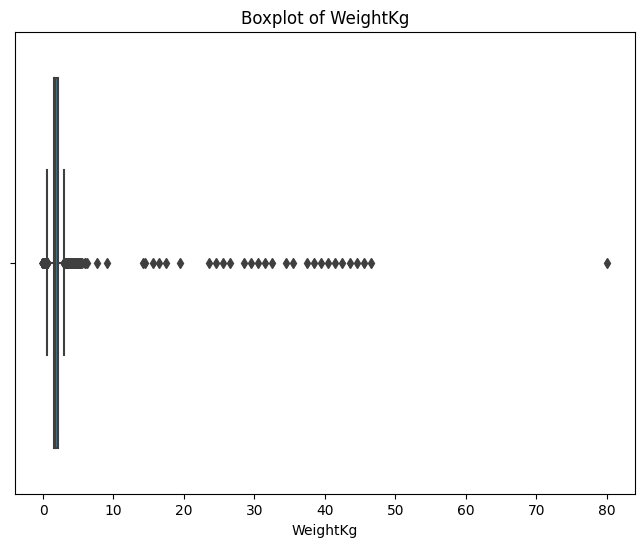

Number of outliers: 476
Mean with outliers: 1.9615109306844096
Standard deviation with outliers: 2.215707748982027
Mean without outliers: 1.7990898127690227
Standard deviation without outliers: 0.4408126305305725


In [69]:
analyze_outliers("WeightKg")

In [70]:
weight_median = df["WeightKg"].median()

df["WeightKg"] = df["WeightKg"].fillna(weight_median)

In [71]:
df.isna().sum()

Price                            0
Title                            0
Hard Drive                     232
Number of USB 3.0 Ports          0
Brand                            0
Series                           1
Processor Brand                  0
Item model number                0
Memory Technology                0
Hard Disk Description            0
Graphics Chipset Brand           0
DisplaySizeInches              150
HorizontalPixels              1226
VerticalPixels                1229
WeightKg                         0
Refurbished                      0
base_color                       0
RAM_in_GB                     1471
Graphics_Coprocessor_Brand       0
OS_Name                          0
MANU_Name                        0
Graphics Storage (GB)          916
Laptop_Type                      0
ProcessorManufacturer            0
ProcessorSpeedGHz              558
dtype: int64

In [72]:
df.loc[df["DisplaySizeInches"] > 100, "DisplaySizeInches"] = pd.NA

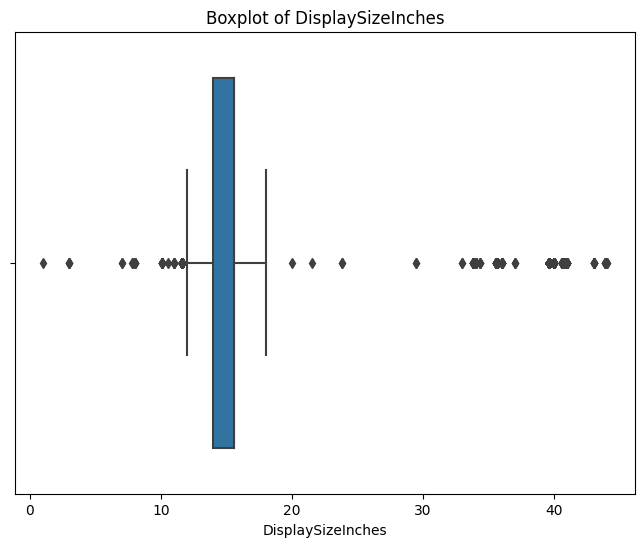

Number of outliers: 674
Mean with outliers: 16.35766670900546
Standard deviation with outliers: 6.082881179990171
Mean without outliers: 14.862882344770107
Standard deviation without outliers: 1.084730110453176


In [73]:
analyze_outliers("DisplaySizeInches")

In [74]:
size_median = df["DisplaySizeInches"].median()

df["DisplaySizeInches"] = df["DisplaySizeInches"].fillna(size_median)

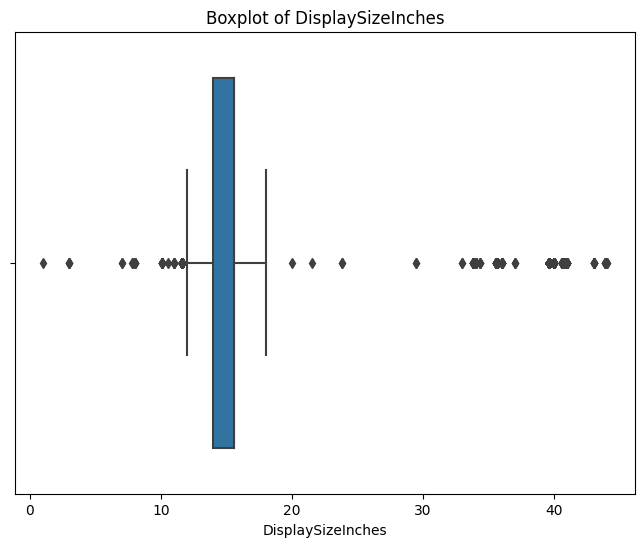

Number of outliers: 674
Mean with outliers: 16.343315887850466
Standard deviation with outliers: 6.025876477415119
Mean without outliers: 14.878124064753095
Standard deviation without outliers: 1.0785686427496628


In [75]:
analyze_outliers("DisplaySizeInches")

In [76]:
horizon_mode = df["HorizontalPixels"].mode()[0]
verti_mode = df["VerticalPixels"].mode()[0]


df["HorizontalPixels"] = df["HorizontalPixels"].fillna(horizon_mode)

df["VerticalPixels"] = df["VerticalPixels"].fillna(verti_mode)

In [77]:
df.isna().sum()

Price                            0
Title                            0
Hard Drive                     232
Number of USB 3.0 Ports          0
Brand                            0
Series                           1
Processor Brand                  0
Item model number                0
Memory Technology                0
Hard Disk Description            0
Graphics Chipset Brand           0
DisplaySizeInches                0
HorizontalPixels                 0
VerticalPixels                   0
WeightKg                         0
Refurbished                      0
base_color                       0
RAM_in_GB                     1471
Graphics_Coprocessor_Brand       0
OS_Name                          0
MANU_Name                        0
Graphics Storage (GB)          916
Laptop_Type                      0
ProcessorManufacturer            0
ProcessorSpeedGHz              558
dtype: int64

In [78]:
ram_mode = df["RAM_in_GB"].mode()[0]
df["RAM_in_GB"] = df["RAM_in_GB"].fillna(ram_mode)

In [79]:
graphic_mode = df["Graphics Storage (GB)"].mode()[0]
df["Graphics Storage (GB)"] = df["Graphics Storage (GB)"].fillna(graphic_mode)

In [80]:
process_mode = df["ProcessorSpeedGHz"].mode()[0]
df["ProcessorSpeedGHz"] = df["ProcessorSpeedGHz"].fillna(process_mode)

In [81]:
df.loc[df["Series"].isna(), "Series"] = "PlaceHolder"

In [82]:
df.isna().sum()

Price                           0
Title                           0
Hard Drive                    232
Number of USB 3.0 Ports         0
Brand                           0
Series                          0
Processor Brand                 0
Item model number               0
Memory Technology               0
Hard Disk Description           0
Graphics Chipset Brand          0
DisplaySizeInches               0
HorizontalPixels                0
VerticalPixels                  0
WeightKg                        0
Refurbished                     0
base_color                      0
RAM_in_GB                       0
Graphics_Coprocessor_Brand      0
OS_Name                         0
MANU_Name                       0
Graphics Storage (GB)           0
Laptop_Type                     0
ProcessorManufacturer           0
ProcessorSpeedGHz               0
dtype: int64

In [95]:
temp = df.copy()

In [92]:
df["Hard Drive"].unique()

array(['512 GB SSD', '128 GB SSD', '1 TB SSD', '64 GB SSD', '256 GB SSD',
       '128 GB Emmc', '64 GB Emmc', '128 GB',
       '32 GB Embedded MultiMediaCard', 'SSD', '16 GB SSD', '32 GB Emmc',
       '256 GB', '512 SSD', '512 GB M.2 2280 SSD', '2 TB SSD',
       '32 GB SSD', '512 GB M.2 2280 NVMe SSD', '1024 GB SSD', 'eMMC SSD',
       '128 GB UFS', 'Emmc', '512 GB', '64 GB Embedded MultiMediaCard',
       '320 GB Emmc', '1 TB', '500 GB', '14 TB SSD', '64 GB',
       '500 GB SSD', '512 GB Solid State Drive', '4 TB SSD', 'HDD',
       'eMMC', '128 GB HDD', 'Embedded MultiMediaCard', '192 GB SSD',
       '128 GB Hybrid', '256 GB HDD', '1000 GB SSD', '256 SSD',
       '8 TB SSD', '2 TB', 'Flash Storage', '1', '156 GB SSD',
       '64 GB HDD', '1 TB HDD', '32 GB', '2048 GB SSD', '8 GB SSD',
       '128 GB Flash Storage', '320 GB Hybrid', '64 SSD', '2000 GB SSD',
       '32 GB HDD', '16 GB', '2 TB Emmc', '240 GB SSD',
       '512 GB 1x 512GB M.2 2280 PCIe Gen4 TLC', nan,
       '32 GB eMMC

In [96]:
import pandas as pd

# Assuming df is your DataFrame
# Clean the values in the "Hard Drive" column
df['Hard Drive'] = df['Hard Drive'].astype(str).replace('\.0', '', regex=True)
df["Hard Drive"] = df["Hard Drive"].str.replace('GB', '')
df["Hard Drive"] = df["Hard Drive"].str.replace('TB', '000')
new = df["Hard Drive"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(str)
df["second"] = df["second"].astype(str)

df["first"] = pd.to_numeric(df["first"], errors='coerce')
df["second"] = pd.to_numeric(df["second"], errors='coerce')

df["first"].fillna(0, inplace=True)
df["second"].fillna(0, inplace=True)

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD_NEW"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD_NEW"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid_NEW"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage_NEW"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [97]:
df.isna().sum()

Price                         0
Title                         0
Hard Drive                    0
Number of USB 3.0 Ports       0
Brand                         0
Series                        0
Processor Brand               0
Item model number             0
Memory Technology             0
Hard Disk Description         0
Graphics Chipset Brand        0
DisplaySizeInches             0
HorizontalPixels              0
VerticalPixels                0
WeightKg                      0
Refurbished                   0
base_color                    0
RAM_in_GB                     0
Graphics_Coprocessor_Brand    0
OS_Name                       0
MANU_Name                     0
Graphics Storage (GB)         0
Laptop_Type                   0
ProcessorManufacturer         0
ProcessorSpeedGHz             0
HDD_NEW                       0
SSD_NEW                       0
Hybrid_NEW                    0
Flash_Storage_NEW             0
dtype: int64

In [98]:
df.to_csv("../data/csv/clean_V2.csv")